# Dissonance curve

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelmin

import dissonant as D

In [36]:
def freq_space(base_f=440, octaves=4, steps=1000):
    ratios = np.linspace(1, octaves, steps)
    freqs = base_f * ratios
    return freqs

def dissonance_curve(freq_space, n_partials=10, model='sethares1993'):
    dissonances = []
    for freq in freq_space:
        h_freqs, h_amps = D.harmonic_tone([freq_space[0], freq], n_partials=n_partials)
        d = D.dissonance(h_freqs, h_amps, model=model)
        dissonances.append(d)
    dissonances = np.array(dissonances)
    return dissonances

def plot_dissonance_curve(freqs, dissonances):
    minima = argrelmin(dissonances)[0]

    plt.figure(figsize=(16, 3))
    plt.xlim(freqs[0], freqs[-1])
    plt.plot(freqs, dissonances)
    for m in minima:
        plt.axvline(freqs[m], c='r', ls=':')
    plt.xlabel('frequency')
    plt.ylabel('dissonance')

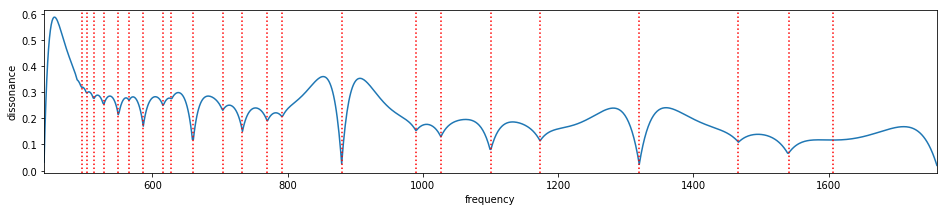

In [70]:
freqs = freq_space()
plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=10, model='sethares1993'))

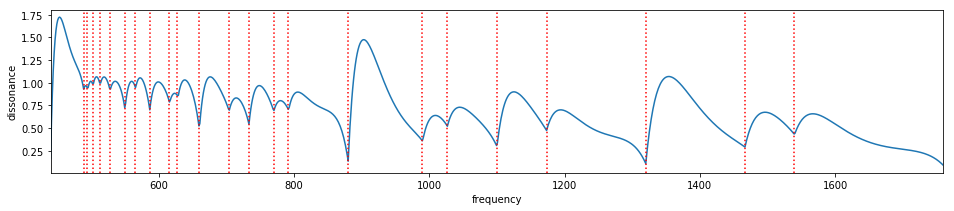

In [71]:
plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=10, model='vassilakis2001'))

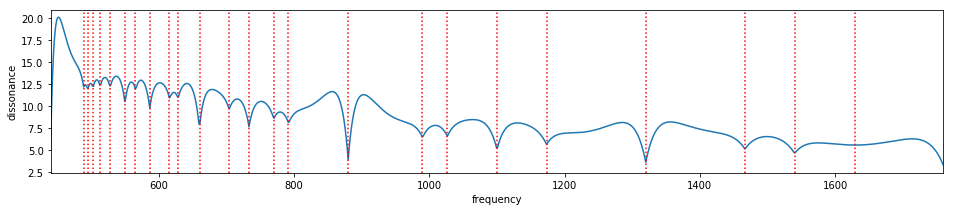

In [72]:
plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=10, model='cook2002'))

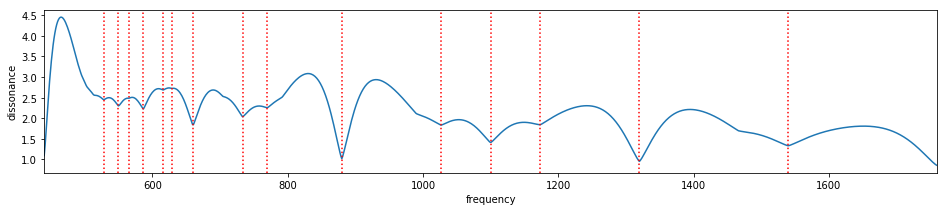

In [73]:
plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=10, model='cook2006'))

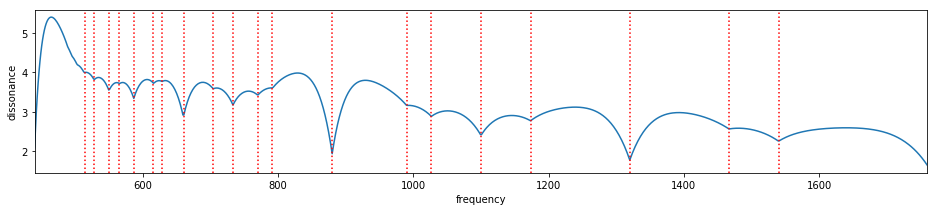

In [74]:
plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=10, model='cook2009'))

# Changing number of partials

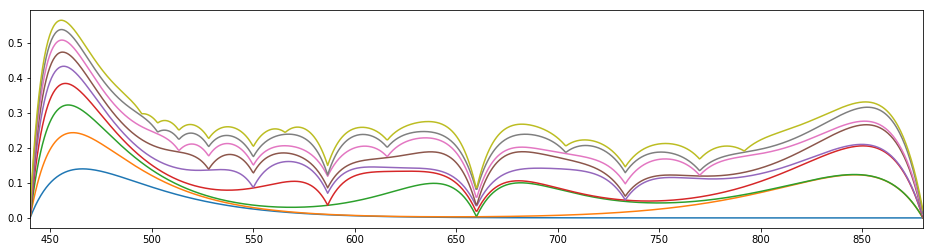

In [69]:
plt.figure(figsize=(16, 4))
for n_partials in range(1, 10):
    dissonances = []
    base_f = D.pitch_to_freq(0)
    ratios = np.linspace(1, 2, 1000)
    freqs = base_f * ratios
    for ratio in ratios:
        h_freqs, h_amps = D.harmonic_tone(base_f * np.array([1, ratio]), n_partials=n_partials)
        d = D.dissonance(h_freqs, h_amps, model='sethares1993')
        dissonances.append(d)
    dissonances = np.array(dissonances)

    minima = argrelmin(dissonances)[0]

    plt.xlim(freqs[0], freqs[-1])
    plt.plot(freqs, dissonances)